In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [134]:
# import dataset
df=pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [116]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [117]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Data Pre-processing

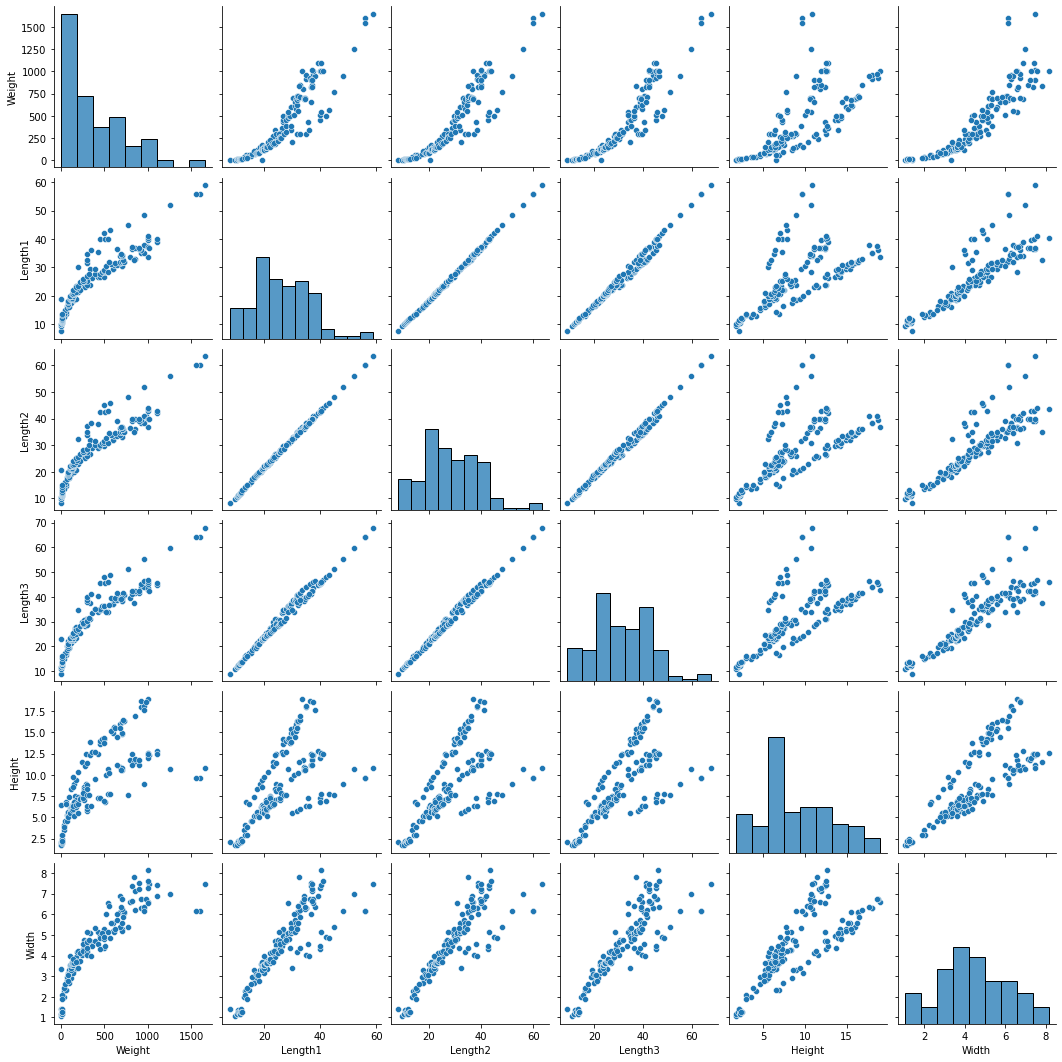

In [119]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:xlabel='Species', ylabel='count'>

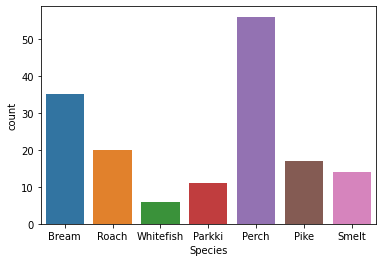

In [120]:
sns.countplot(x= df.Species)

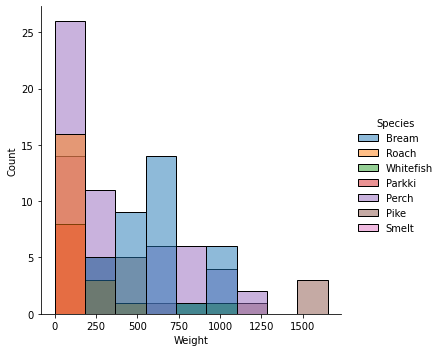

In [121]:
sns.displot(data=df, x='Weight', hue='Species', kind='hist')


In [122]:
# label encoding
from sklearn.preprocessing import LabelEncoder  

In [130]:
label_encoder = LabelEncoder()
df['Species'] =label_encoder.fit_transform(df["Species"])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [138]:
# splitting data into train test data
from sklearn.model_selection import train_test_split

X = df.drop(['Species'], axis = 1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

# Linear Regression

In [139]:
# Initiatlize the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
lr.fit(X_train, y_train)

# Predict on test data
y_pred_test = lr.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 93.75%


In [140]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,y_pred_test))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,y_pred_test))

Logistic Regression

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
      Parkki       1.00      1.00      1.00         3
       Perch       0.91      1.00      0.95        20
        Pike       1.00      1.00      1.00         6
       Roach       1.00      0.80      0.89         5
       Smelt       0.83      1.00      0.91         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.82      0.83      0.82        48
weighted avg       0.90      0.94      0.92        48


confusion matrix
[[ 7  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  1  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  2  0  0  0  0]]


/Users/tejasd/opt/anaconda3/envs/lab/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejasd/opt/anaconda3/envs/lab/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejasd/opt/anaconda3/envs/lab/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [141]:
# save the model into pkl sav
import pickle

# Save the model to disk
pickle_out = open('lr.pkl', 'wb')
pickle.dump(lr, pickle_out)
pickle_out.close()